# <center>CDC Data - Healthcare Analysis </center>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Importing Libraries

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
import scipy.stats as stats

import statsmodels.api as sm

In [3]:
pd.set_option('display.max_columns', None)

## Merging all data sets

In [4]:
obesity = pd.read_excel(r"C:\Users\Nikita\Desktop\MS\adv. math-stats\Project1 - data sets\cdc-diabetes-2018.xlsx", sheet_name = 'Obesity')
inactivity = pd.read_excel(r"C:\Users\Nikita\Desktop\MS\adv. math-stats\Project1 - data sets\cdc-diabetes-2018.xlsx", sheet_name = 'Inactivity')
diabetes = pd.read_excel(r"C:\Users\Nikita\Desktop\MS\adv. math-stats\Project1 - data sets\cdc-diabetes-2018.xlsx", sheet_name = 'Diabetes')

obesity = obesity.rename({'STATE':'STATEW'}, axis='columns')
inactivity = inactivity.rename({'FIPDS':'FIPS'}, axis='columns')
diabetes = diabetes.rename({'STATEW':'STATE'}, axis='columns')

In [5]:
df1 = pd.merge(diabetes, obesity, how = 'inner', on = 'FIPS',suffixes= ('', '_remove'))

columns_to_remove = [column for column in df1.columns if '_remove' in column]
df1.drop(columns_to_remove, axis = 1, inplace = True)
df1.drop(['STATEW'], axis = 1, inplace = True)

df2 = pd.merge(df1, inactivity, how = 'inner', on = 'FIPS',suffixes= ('', '_remove'))

columns_to_remove = [column for column in df2.columns if '_remove' in column]
df2.drop(columns_to_remove, axis = 1, inplace = True)
#diabeties_totaldata.drop(['STATEW'], axis = 1, inplace = True)

df2.head()

,YEAR,FIPS,COUNTY,STATE,% DIABETIC,% OBESE,% INACTIVE
0,2018,1011,Bullock County,Alabama,9.4,18.7,17.0
1,2018,2068,Denali Borough,Alaska,6.8,18.9,16.2
2,2018,2105,Hoonah-Angoon Census Area,Alaska,7.3,19.4,15.0
3,2018,2195,Petersburg Census Area,Alaska,9.2,17.2,17.8
4,2018,2230,Skagway Municipality,Alaska,6.6,18.3,15.8


In [6]:
h1= pd.read_excel(r"C:\Users\Nikita\Desktop\MS\adv. math-stats\Project1 - data sets\Diabetes_health_care_no_health_insurance.xlsx")
h2= pd.read_excel(r"C:\Users\Nikita\Desktop\MS\adv. math-stats\Project1 - data sets\Diabetes_health_care_no_of_primary_care_physicians (1).xlsx")
h3= pd.read_excel(r"C:\Users\Nikita\Desktop\MS\adv. math-stats\Project1 - data sets\Diabetes_health_care_primary_care_physicians (1).xlsx")


h1 = h1.rename({'State':'STATE', 'County':'COUNTY', 'County_FIPS': 'FIPS'}, axis='columns')
h2 = h2.rename({'State':'STATE', 'County':'COUNTY', 'County_FIPS': 'FIPS'}, axis='columns')
h3 = h3.rename({'State':'STATE', 'County':'COUNTY', 'County_FIPS': 'FIPS'}, axis='columns')
#h1.head()
#h2.head()
#h3.head()

In [7]:
dh1 = pd.merge(h1, h2, how = 'inner', on = 'FIPS',suffixes= ('', '_remove'))

columns_to_remove = [column for column in dh1.columns if '_remove' in column]
dh1.drop(columns_to_remove, axis = 1, inplace = True)
dh1.drop(['Diagnosed Diabetes Percentage'], axis = 1, inplace = True)
#dh1.head()

dh2 = pd.merge(dh1, h3, how = 'inner', on = 'FIPS',suffixes= ('', '_remove'))

columns_to_remove = [column for column in dh2.columns if '_remove' in column]
dh2.drop(columns_to_remove, axis = 1, inplace = True)
dh2.drop(['Diagnosed Diabetes Percentage'], axis = 1, inplace = True)

#dh2.head()
#dh2.info()

In [8]:
totalh = pd.merge(df2, dh2, how = 'inner', on = 'FIPS',suffixes= ('', '_remove'))

columns_to_remove = [column for column in totalh.columns if '_remove' in column]
totalh.drop(columns_to_remove, axis = 1, inplace = True)
totalh.drop(['Year'], axis = 1, inplace = True)
totalh.head()

,YEAR,FIPS,COUNTY,STATE,% DIABETIC,% OBESE,% INACTIVE,No Health Insurance,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population
0,2018,1011,Bullock County,Alabama,9.4,18.7,17.0,11.4,3,29.70003
1,2018,2068,Denali Borough,Alaska,6.8,18.9,16.2,18.5,No Data,No Data
2,2018,2105,Hoonah-Angoon Census Area,Alaska,7.3,19.4,15.0,24.7,No Data,No Data
3,2018,2195,Petersburg Census Area,Alaska,9.2,17.2,17.8,9.6,6,183.71096
4,2018,2230,Skagway Municipality,Alaska,6.6,18.3,15.8,18.2,No Data,No Data


In [9]:
## Checking if we have any null values after all merging
totalh.isnull().any().sum()

0

In [56]:
totalh1 = totalh
totalh1.drop(['YEAR', 'FIPS'], axis = 1, inplace = True)
totalh1.describe()

,% DIABETIC,% OBESE,% INACTIVE,No Health Insurance,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population
count,354.000000,354.000000,354.000000,353.000000,268.000000,268.000000
mean,7.115819,18.252542,14.776271,12.917847,30.201493,52.903927
std,0.728442,1.029484,1.544542,6.336339,169.783924,41.182936
min,3.800000,10.500000,8.800000,0.700000,1.000000,5.068170
25%,6.800000,17.900000,14.000000,7.700000,1.000000,25.471732
50%,7.000000,18.300000,14.400000,12.700000,4.000000,38.819160
75%,7.400000,18.975000,15.475000,17.300000,10.000000,70.240678
max,9.700000,19.500000,19.400000,33.700000,2256.000000,301.019360


## Handling Missing Data

In [10]:
# Number of rows that are having "No Data" 
no_data_rows = (totalh == "No Data").any(axis = 0)

dataframe_with_missing_data = totalh.loc[:, no_data_rows]
no_data_columns = dataframe_with_missing_data.columns

dataframe_with_missing_data.head()

,No Health Insurance,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population
0,11.4,3,29.70003
1,18.5,No Data,No Data
2,24.7,No Data,No Data
3,9.6,6,183.71096
4,18.2,No Data,No Data


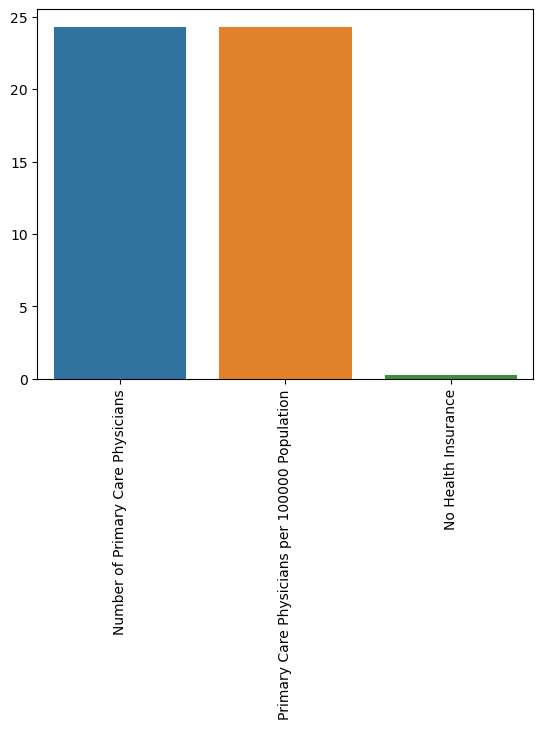

In [11]:
totalh = totalh.replace("No Data", np.nan)

missing_values = totalh[no_data_columns].isnull().sum().sort_values(ascending = False) / len(totalh) * 100

sns.barplot(x = list(missing_values.index), y = missing_values.values)
plt.xticks(rotation = 90)

plt.show()

In [12]:
totalh.columns

Index(['YEAR', 'FIPS', 'COUNTY', 'STATE', '% DIABETIC', '% OBESE',
       '% INACTIVE', 'No Health Insurance',
       'Number of Primary Care Physicians',
       'Primary Care Physicians per 100000 Population'],
      dtype='object')

In [13]:
# Data type conversions
categorical_features = ['COUNTY', 'STATE']
numerical_features = [feature for feature in totalh.columns if feature not in categorical_features]

totalh.head()

,YEAR,FIPS,COUNTY,STATE,% DIABETIC,% OBESE,% INACTIVE,No Health Insurance,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population
0,2018,1011,Bullock County,Alabama,9.4,18.7,17.0,11.4,3.0,29.70003
1,2018,2068,Denali Borough,Alaska,6.8,18.9,16.2,18.5,NaN,NaN
2,2018,2105,Hoonah-Angoon Census Area,Alaska,7.3,19.4,15.0,24.7,NaN,NaN
3,2018,2195,Petersburg Census Area,Alaska,9.2,17.2,17.8,9.6,6.0,183.71096
4,2018,2230,Skagway Municipality,Alaska,6.6,18.3,15.8,18.2,NaN,NaN


In [14]:
totalh[numerical_features] = totalh[numerical_features].astype('float')
totalh[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 353
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   YEAR                                           354 non-null    float64
 1   FIPS                                           354 non-null    float64
 2   % DIABETIC                                     354 non-null    float64
 3   % OBESE                                        354 non-null    float64
 4   % INACTIVE                                     354 non-null    float64
 5   No Health Insurance                            353 non-null    float64
 6   Number of Primary Care Physicians              268 non-null    float64
 7   Primary Care Physicians per 100000 Population  268 non-null    float64
dtypes: float64(8)
memory usage: 24.9 KB


## Health care factors

In [15]:
temp1= totalh
temp1 = temp1.drop(['YEAR', 'FIPS', 'COUNTY', 'STATE'], axis = 1)

numerical_features = [feature for feature in temp1.columns if temp1[feature].dtype != 'object']
temp1.head()

#numerical_features = [feature for feature in temp_dataset.columns if temp1[feature].dtype != 'object']

,% DIABETIC,% OBESE,% INACTIVE,No Health Insurance,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population
0,9.4,18.7,17.0,11.4,3.0,29.70003
1,6.8,18.9,16.2,18.5,NaN,NaN
2,7.3,19.4,15.0,24.7,NaN,NaN
3,9.2,17.2,17.8,9.6,6.0,183.71096
4,6.6,18.3,15.8,18.2,NaN,NaN


In [17]:
# descriptive Statistics

temp1.describe()

,% DIABETIC,% OBESE,% INACTIVE,No Health Insurance,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population
count,354.000000,354.000000,354.000000,353.000000,268.000000,268.000000
mean,7.115819,18.252542,14.776271,12.917847,30.201493,52.903927
std,0.728442,1.029484,1.544542,6.336339,169.783924,41.182936
min,3.800000,10.500000,8.800000,0.700000,1.000000,5.068170
25%,6.800000,17.900000,14.000000,7.700000,1.000000,25.471732
50%,7.000000,18.300000,14.400000,12.700000,4.000000,38.819160
75%,7.400000,18.975000,15.475000,17.300000,10.000000,70.240678
max,9.700000,19.500000,19.400000,33.700000,2256.000000,301.019360


## Creating Plots For Analysis

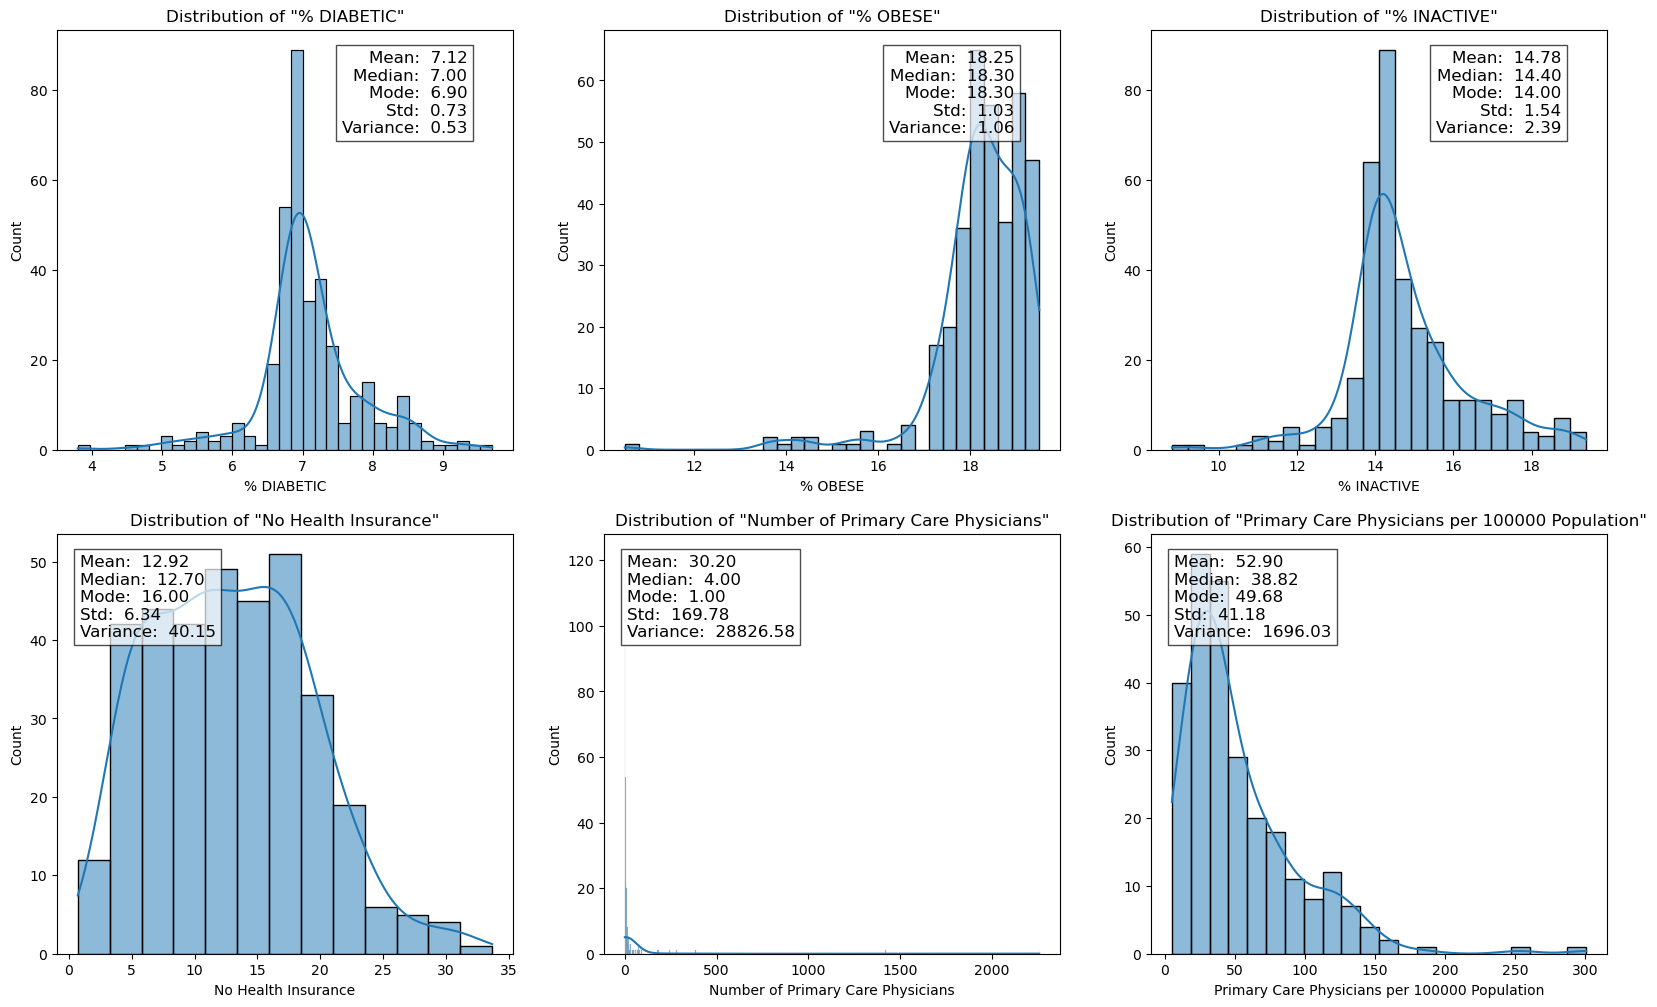

In [22]:
# histogrom
fig, ax = plt.subplots(2, int(len(numerical_features) / 2), figsize=(20, 12))

row, col = 0, 0
for feature in numerical_features:
    
    mean = temp1[feature].mean()
    median = temp1[feature].median()
    mode = temp1[feature].mode().values[0]
    std = temp1[feature].std()
    variance = temp1[feature].var()
    
    sns.histplot(temp1[feature], ax = ax[row, col], kde=True)
    ax[row, col].set_title('Distribution of "{}"'.format(feature))
    
    stats_text = f"Mean: {mean: .2f}\nMedian: {median: .2f}\nMode: {mode: .2f}\nStd: {std: .2f}\nVariance: {variance: .2f}"
    
    if row == 0:
        ax[row, col].text(
            0.9, 0.95, stats_text, transform = ax[row, col].transAxes, 
            fontsize = 12, horizontalalignment = 'right', verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.7))
    else:
        ax[row, col].text(
            0.05, 0.95, stats_text, transform = ax[row, col].transAxes, 
            fontsize = 12, horizontalalignment = 'left', verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.7))
    
    col = col + 1
    if col == ax.shape[1]:
        row = row + 1
        col = 0
        
plt.show()

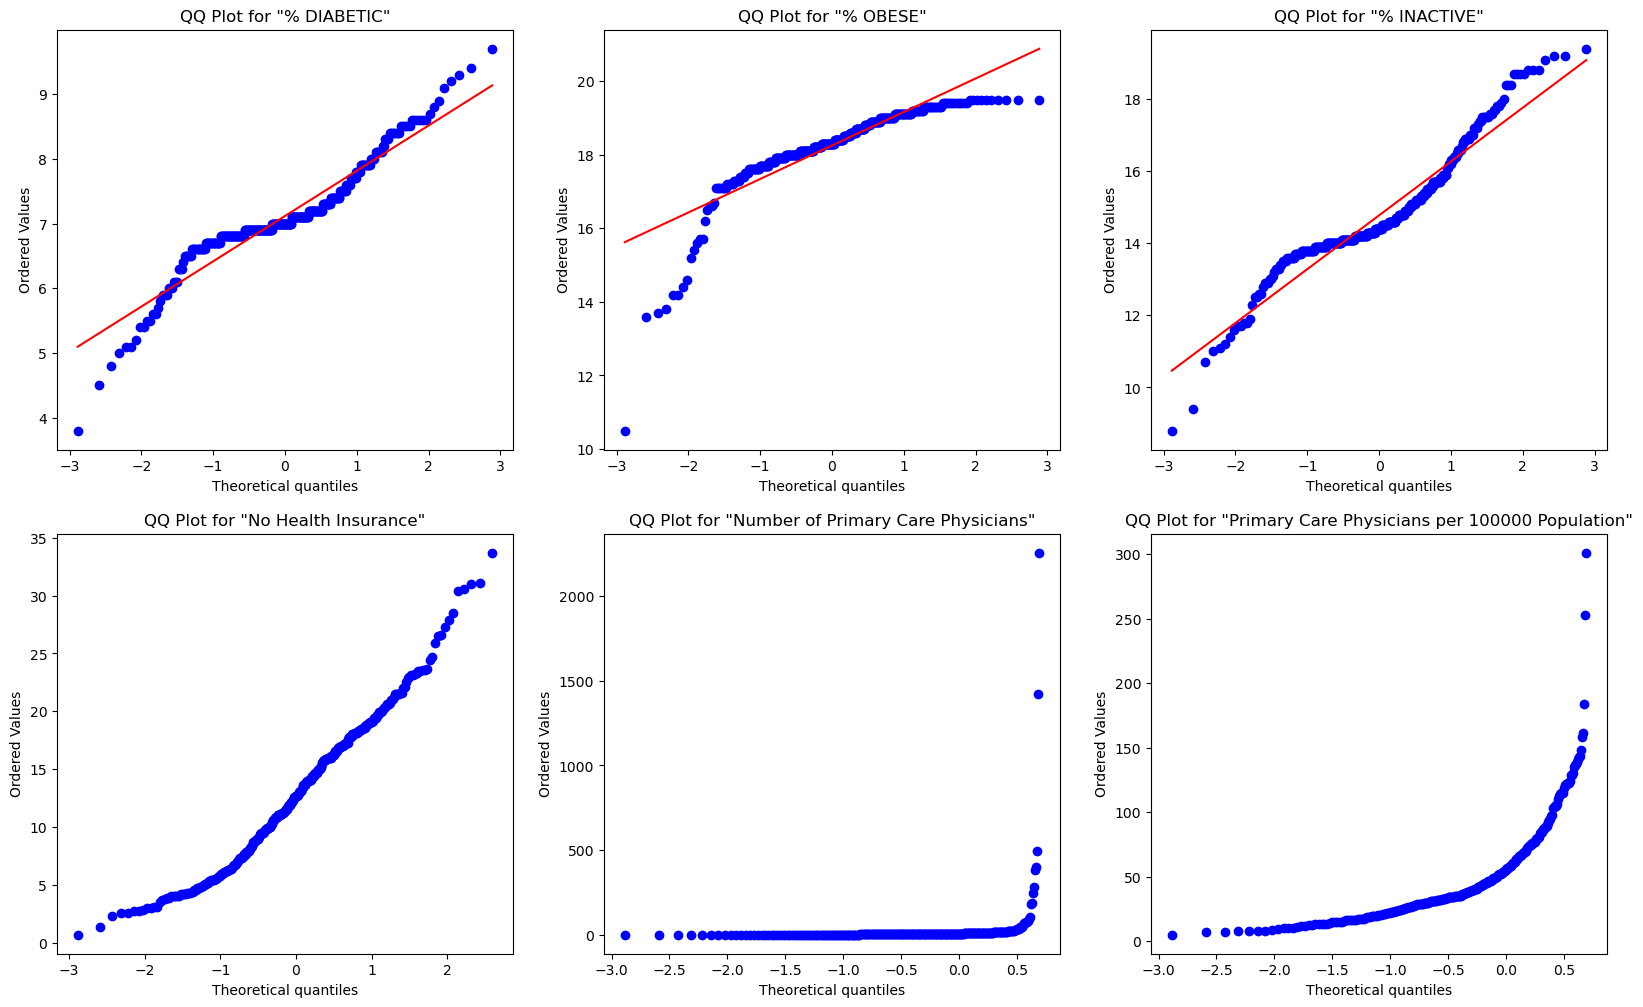

In [23]:
# Q-Q plots

fig, ax = plt.subplots(2, int(len(numerical_features) / 2), figsize=(20, 12))

row, col = 0, 0
for feature in numerical_features:

    stats.probplot(temp1[feature], dist = "norm", plot = ax[row, col])
    ax[row, col].set_title(f'QQ Plot for "{feature}"')

    col = col + 1
    if col == ax.shape[1]:
        row = row + 1
        col = 0

plt.show()

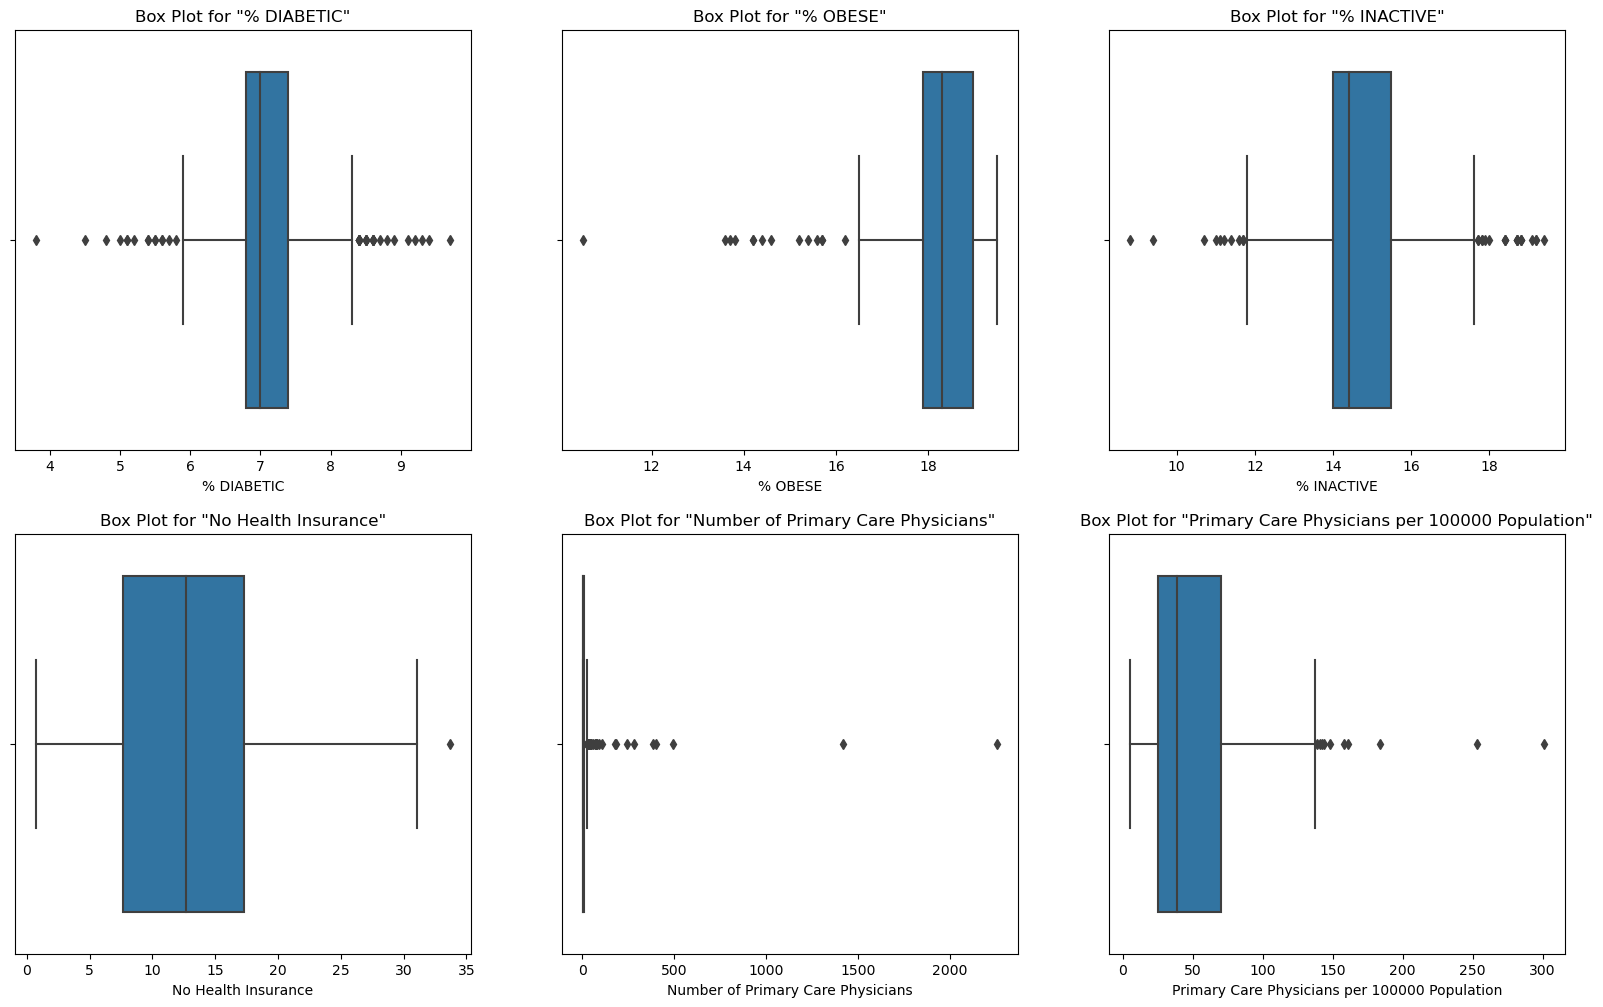

In [24]:
#Box plots
fig, ax = plt.subplots(2, int(len(numerical_features) / 2), figsize=(20, 12))

row, col = 0, 0
for feature in numerical_features:
    
    sns.boxplot(x = temp1[feature], ax = ax[row, col])
    ax[row, col].set_title(f'Box Plot for "{feature}"')

    col = col + 1
    if col == ax.shape[1]:
        row = row + 1
        col = 0

plt.show()

In [ ]:
# removing outliers

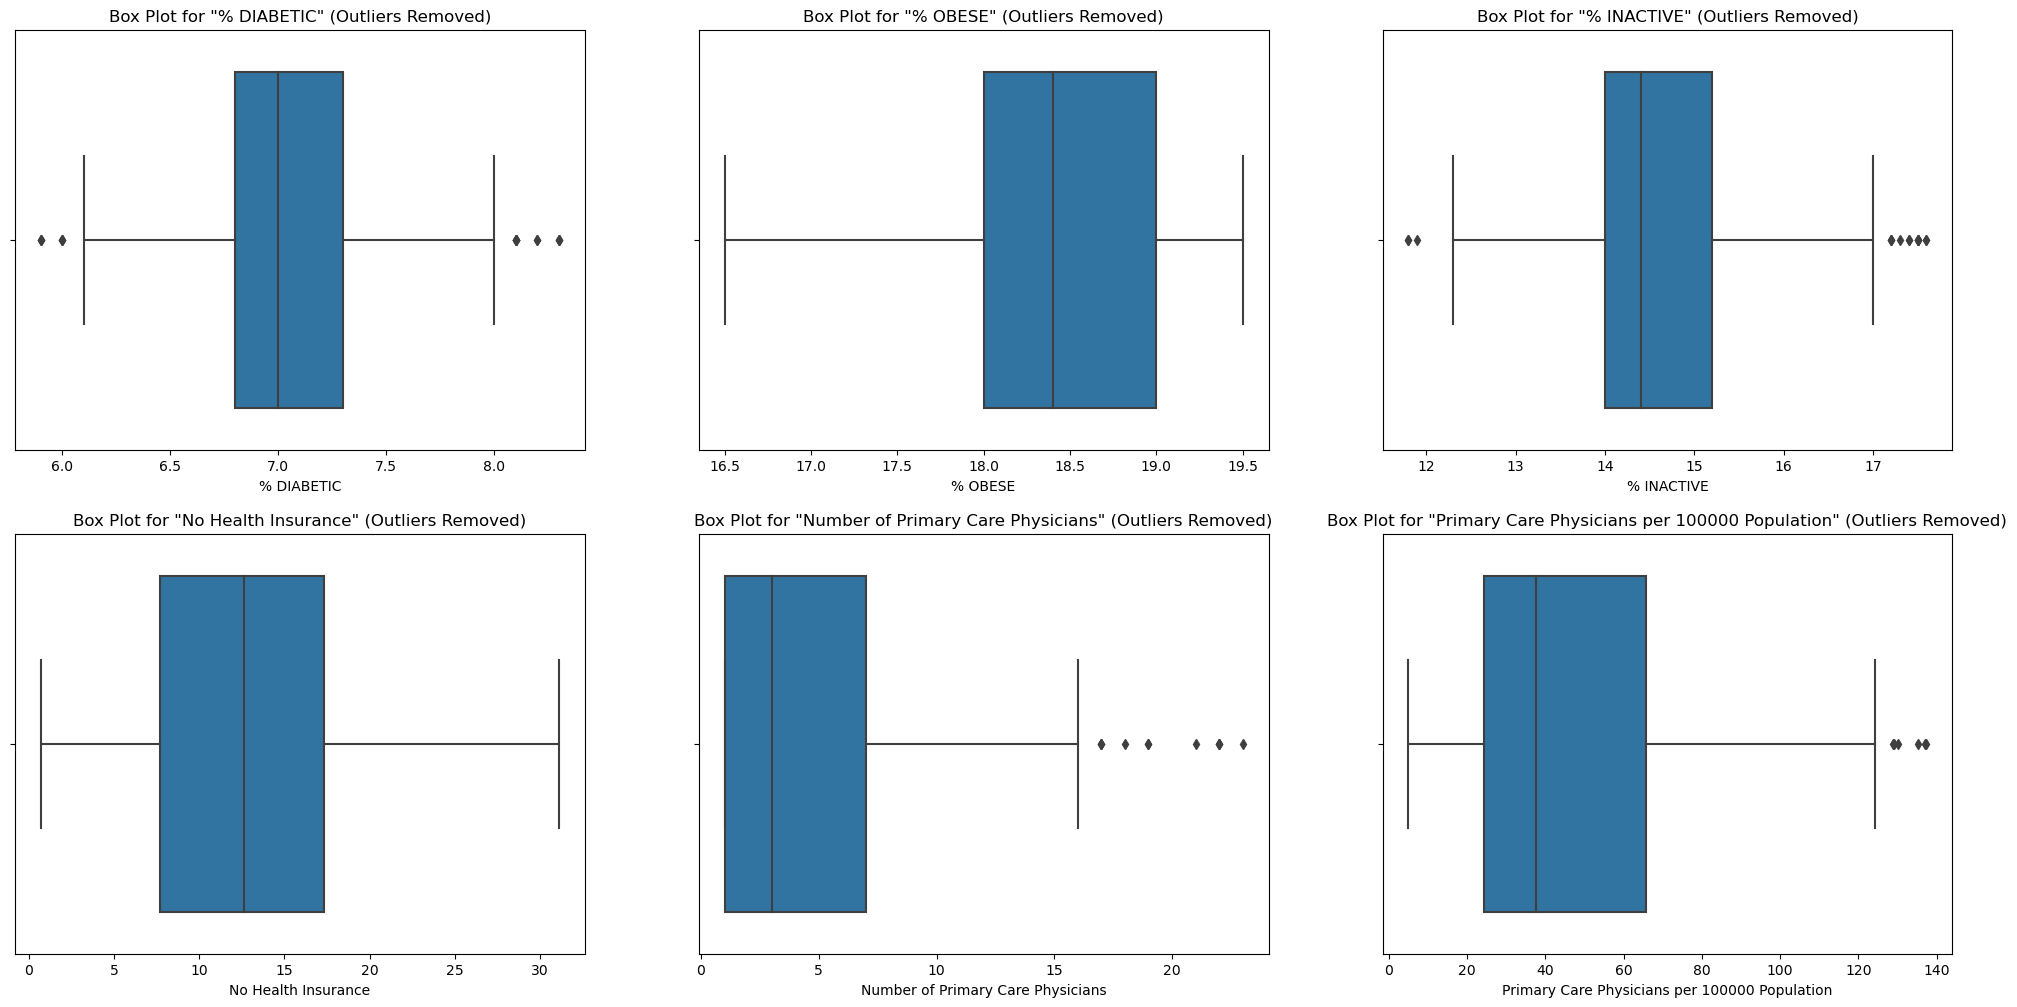

In [25]:
fig, ax = plt.subplots(2, int(len(numerical_features) / 2), figsize=(25, 12))

row, col = 0, 0
for feature in numerical_features:
    
    Q1 = temp1[feature].quantile(0.25)
    Q3 = temp1[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    temp2 = temp1[(temp1[feature] >= lower_bound) & (temp1[feature] <= upper_bound)]  #temp2 is no outliers dataframe

    sns.boxplot(x = temp2[feature], ax = ax[row, col])
    ax[row, col].set_title(f'Box Plot for "{feature}" (Outliers Removed)')

    col = col + 1
    if col == ax.shape[1]:
        row = row + 1
        col = 0

plt.show()

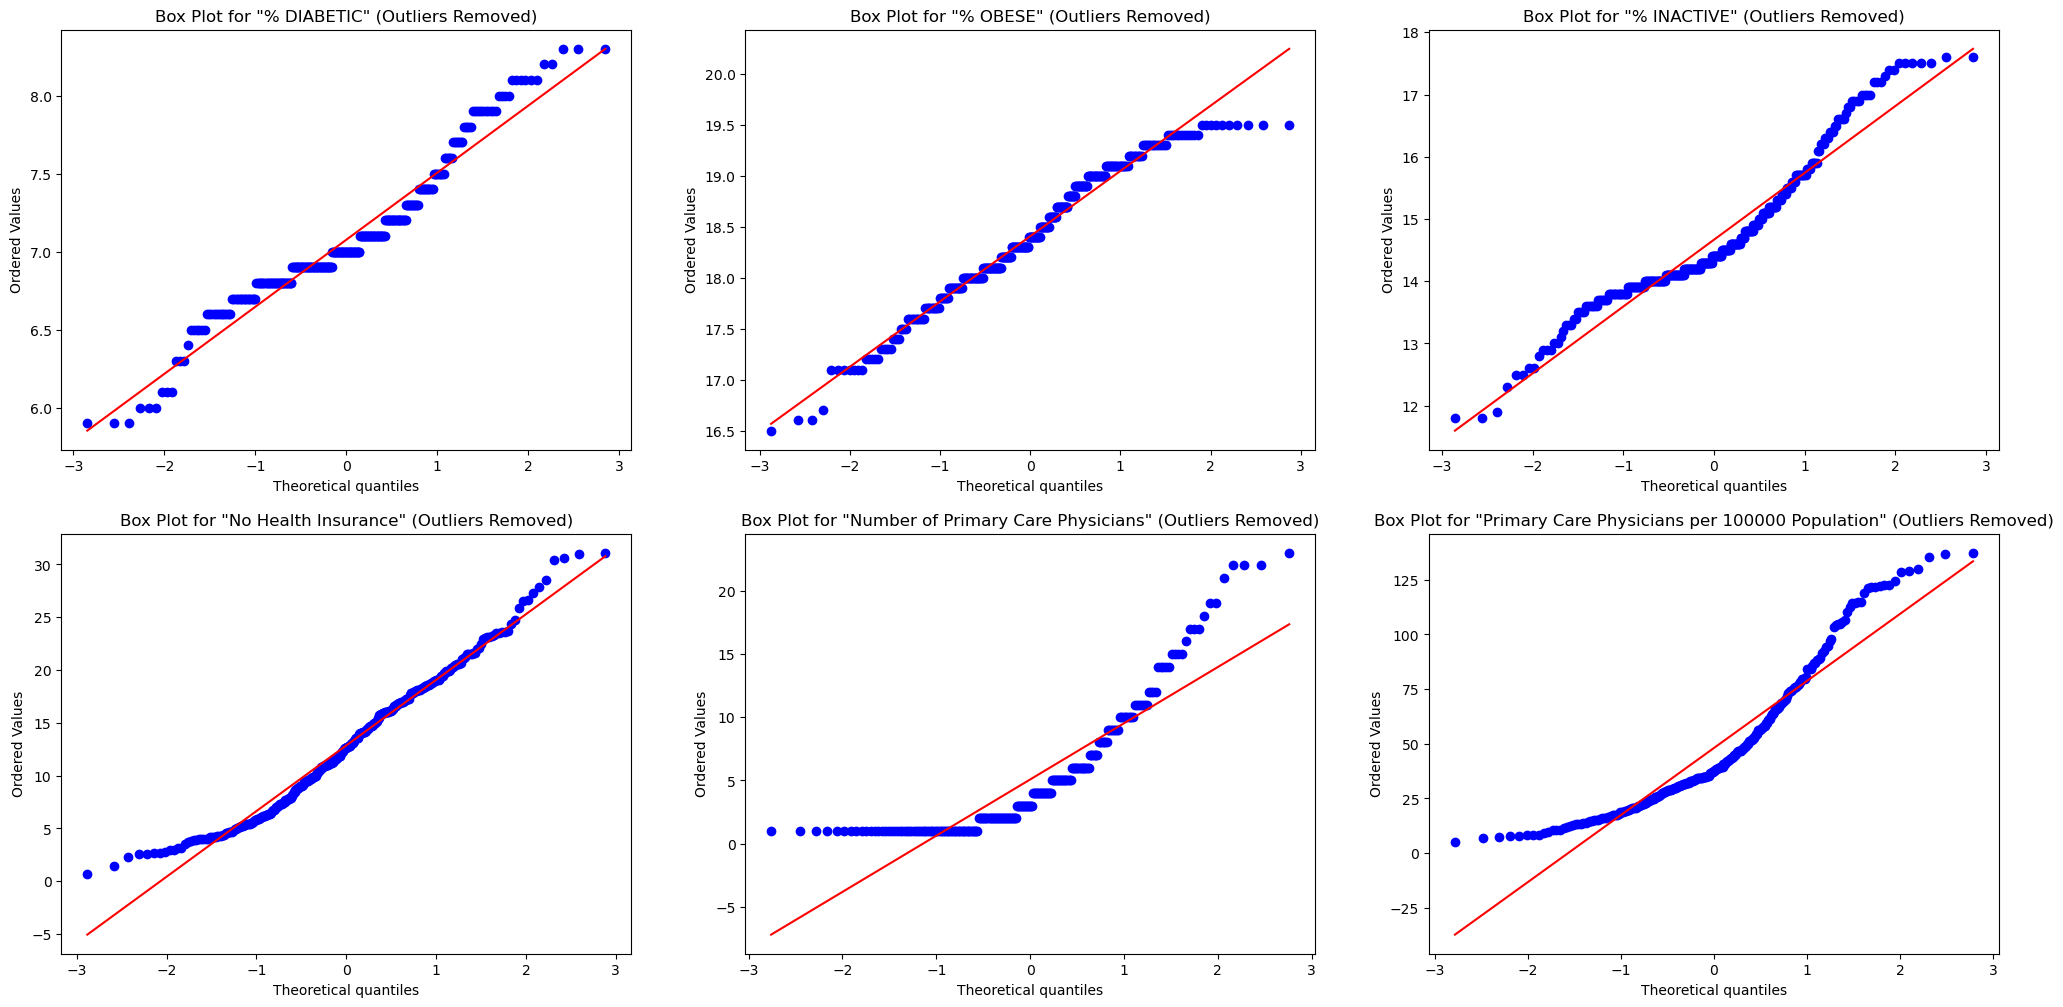

In [27]:
fig, ax = plt.subplots(2, int(len(numerical_features) / 2), figsize=(25, 12))

row, col = 0, 0
for feature in numerical_features:
    
    Q1 = temp1[feature].quantile(0.25)
    Q3 = temp1[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    temp2 = temp1[(temp1[feature] >= lower_bound) & (temp1[feature] <= upper_bound)] #temp2 is no outliers dataframe

    stats.probplot(x = temp2[feature], dist = 'norm', plot = ax[row, col])
    ax[row, col].set_title(f'Box Plot for "{feature}" (Outliers Removed)')

    col = col + 1
    if col == ax.shape[1]:
        row = row + 1
        col = 0

plt.show()

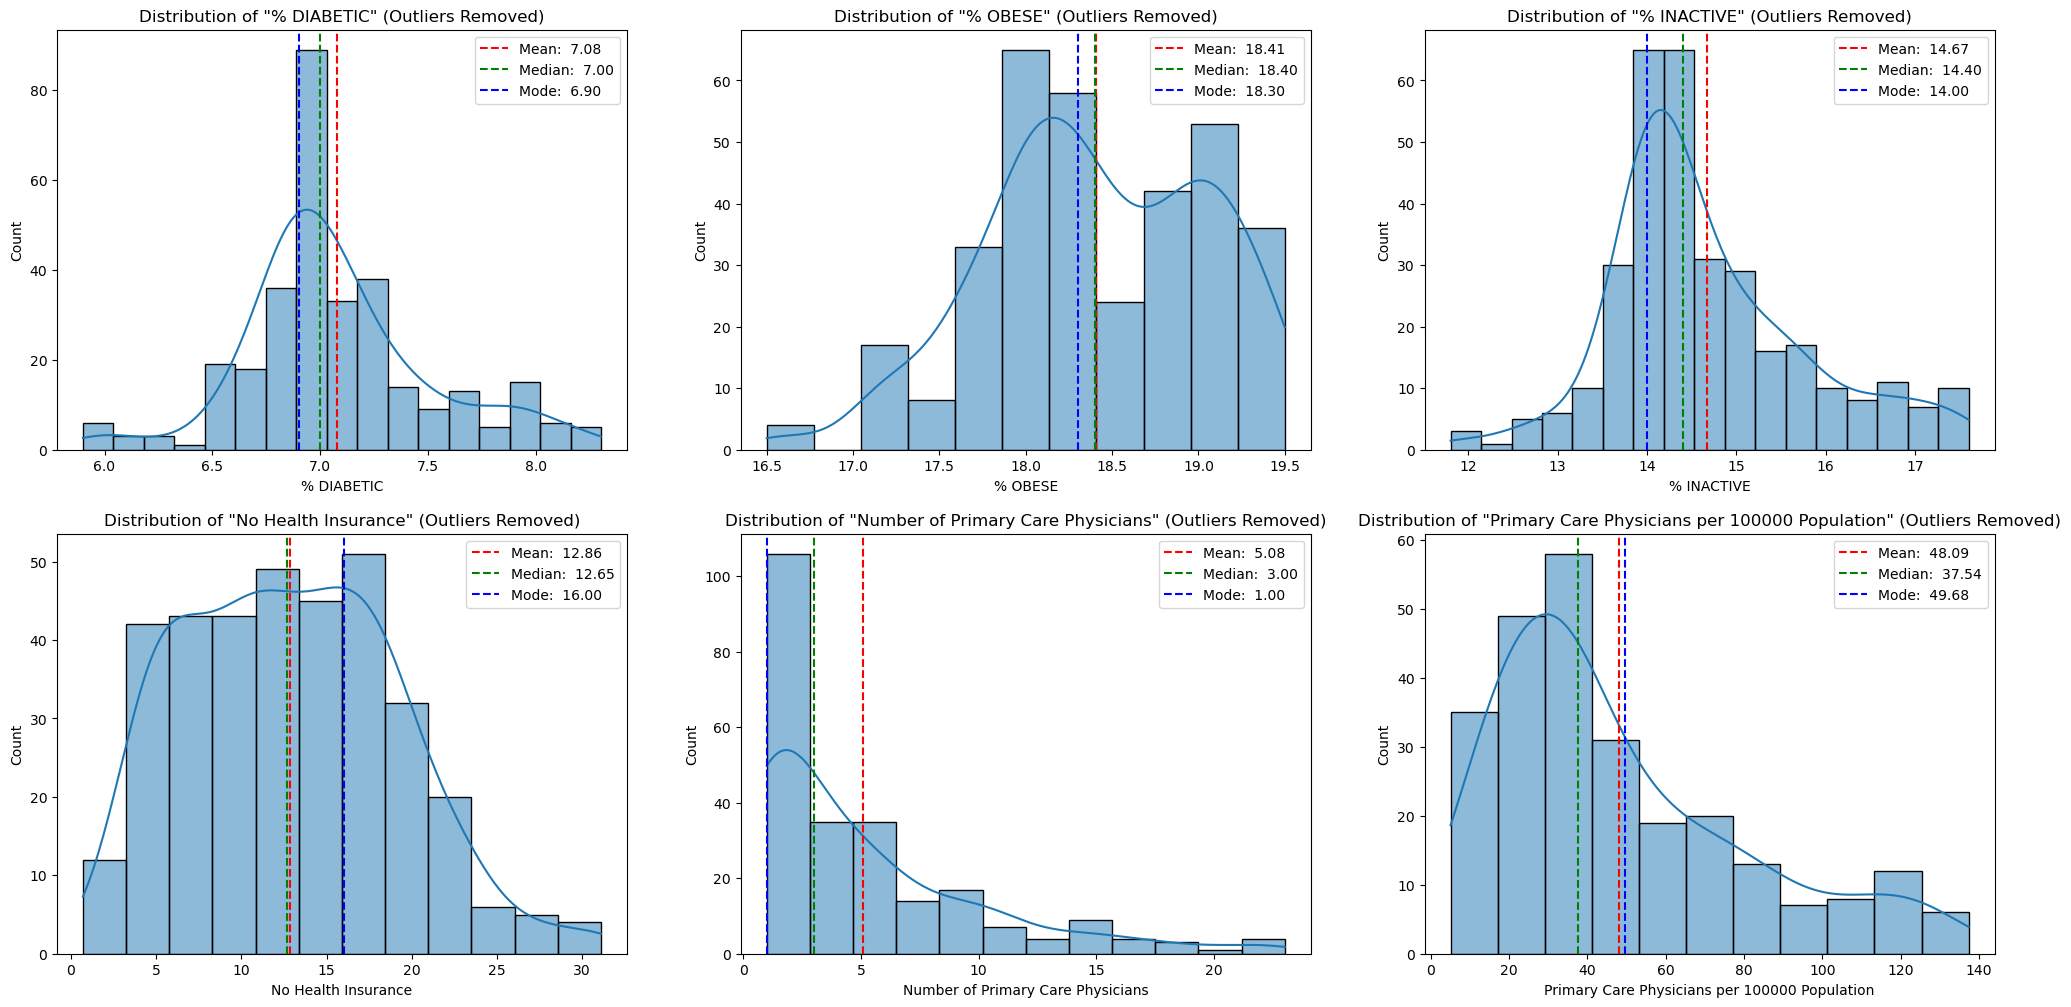

In [28]:
fig, ax = plt.subplots(2, int(len(numerical_features) / 2), figsize=(25, 12))

row, col = 0, 0
for feature in numerical_features:
    
    Q1 = temp1[feature].quantile(0.25)
    Q3 = temp1[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    temp2 = temp1[(temp1[feature] >= lower_bound) & (temp1[feature] <= upper_bound)]
    
    sns.histplot(temp2[feature], ax = ax[row, col], kde = True)
    ax[row, col].set_title(f'Distribution of "{feature}" (Outliers Removed)')
    
    mean = temp2[feature].mean()
    median = temp2[feature].median()
    mode = temp2[feature].mode().values[0]

    ax[row, col].axvline(mean, color = 'r', linestyle = '--', label = f'Mean: {mean: .2f}')
    ax[row, col].axvline(median, color = 'g', linestyle = '--', label = f'Median: {median: .2f}')
    ax[row, col].axvline(mode, color = 'b', linestyle = '--', label = f'Mode: {mode: .2f}')
    
    ax[row, col].legend()

    col = col + 1
    if col == ax.shape[1]:
        row = row + 1
        col = 0

plt.show()

In [ ]:
## correlation

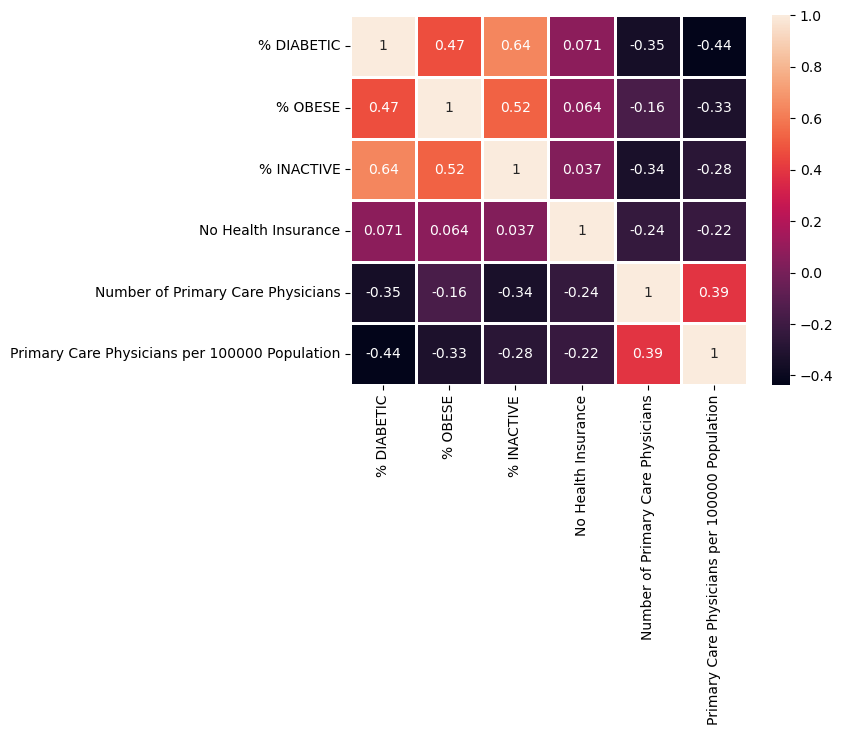

In [40]:
sns.heatmap(temp2.corr(), annot = True, linewidths = 2)

plt.show()

In [32]:
temp2.head()

,% DIABETIC,% OBESE,% INACTIVE,No Health Insurance,Number of Primary Care Physicians,Primary Care Physicians per 100000 Population
0,9.4,18.7,17.0,11.4,3.0,29.70003
5,7.9,19.0,16.8,10.2,2.0,22.25684
7,7.1,18.1,15.4,5.8,17.0,94.24026
9,7.4,17.1,13.3,5.6,6.0,34.87764
10,6.8,18.6,13.8,16.1,11.0,76.15619


## Statistical testing

### Q1 Is there a relation %Diabetic with no health insurance?

Null Hypothesis (H0): There is no relationship between 'No Health Insurance' and % DIABETIC rates.</br>
Alternative Hypothesis (H1): There is a relationship between 'No Health Insurance' and % DIABETIC rates.

In [36]:


pearson_corr, p_value = stats.pearsonr(temp2['No Health Insurance'], temp2['% DIABETIC'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between 'No Health Insurance' and '% DIABETIC Rates'.")
else:
    print("Reject Alternative hypothesis: There is no significant relationship between 'No Health Insurance' and '% DIABETIC Rates'.")

Pearson Correlation Coefficient: 0.0714116885556852
P-Value: 0.2530670171462789
Reject Alternative hypothesis: There is no significant relationship between 'No Health Insurance' and '% DIABETIC Rates'.


### Q2 Is there a relation %OBESE with no health insurance?

Null Hypothesis (H0): There is no relationship between 'No Health Insurance' and % OBESE.</br>
Alternative Hypothesis (H1): There is a relationship between 'No Health Insurance' and % OBESE.

In [37]:

pearson_corr, p_value = stats.pearsonr(temp2['No Health Insurance'], temp2['% OBESE'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between 'No Health Insurance' and '% OBESE'.")
else:
    print("Reject Alternative hypothesis: There is no significant relationship between 'No Health Insurance' and '% OBESE'.")

Pearson Correlation Coefficient: 0.06368119228049594
P-Value: 0.3082318641916204
Reject Alternative hypothesis: There is no significant relationship between 'No Health Insurance' and '% OBESE'.


### Q3 Is there a relation %INACTIVE with no health insurance?

Null Hypothesis (H0): There is no relationship between 'No Health Insurance' and % INACTIVE.</br>
Alternative Hypothesis (H1): There is a relationship between 'No Health Insurance' and % INACTIVE.

In [59]:

pearson_corr, p_value = stats.pearsonr(temp2['No Health Insurance'], temp2['% INACTIVE'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between 'No Health Insurance' and '% NACTIVE'.")
else:
    print("Reject Alternative hypothesis: There is no significant relationship between 'No Health Insurance' and '% INACTIVE'.")

Pearson Correlation Coefficient: 0.036940068929688485
P-Value: 0.5547443374604137
Reject Alternative hypothesis: There is no significant relationship between 'No Health Insurance' and '% INACTIVE'.


## Multiple linear regression on all factors

In [51]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

independent_vars = ['No Health Insurance', 'Number of Primary Care Physicians', 'Primary Care Physicians per 100000 Population']

temp2['intercept'] = 1

X = temp2[['No Health Insurance', 'Number of Primary Care Physicians', 'Primary Care Physicians per 100000 Population', '% OBESE', '% INACTIVE']]
y = temp2['% DIABETIC']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.489
Method:                 Least Squares   F-statistic:                              50.44
Date:                Thu, 05 Oct 2023   Prob (F-statistic):                    3.93e-36
Time:                        13:57:06   Log-Likelihood:                         -276.87
No. Observations:                 258   AIC:                                      563.7
Df Residuals:                     253   BIC:                                      581.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Nikita\AppData\Local\Temp\ipykernel_14568\1114524848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['intercept'] = 1


## Multiple Linear regression on only Health Factors

In [52]:
independent_vars = ['No Health Insurance', 'Number of Primary Care Physicians', 'Primary Care Physicians per 100000 Population']

temp2['intercept'] = 1

X = temp2[['No Health Insurance', 'Number of Primary Care Physicians', 'Primary Care Physicians per 100000 Population']]
y = temp2['% DIABETIC']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

model1 = sm.OLS(y, X).fit()
summary1 = model1.summary()
print(summary1)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.235
Model:                            OLS   Adj. R-squared (uncentered):              0.226
Method:                 Least Squares   F-statistic:                              26.05
Date:                Thu, 05 Oct 2023   Prob (F-statistic):                    9.92e-15
Time:                        14:02:07   Log-Likelihood:                         -331.61
No. Observations:                 258   AIC:                                      669.2
Df Residuals:                     255   BIC:                                      679.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Nikita\AppData\Local\Temp\ipykernel_14568\1800799942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['intercept'] = 1


In [58]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

independent_vars = ['No Health Insurance', 'Number of Primary Care Physicians', 'Primary Care Physicians per 100000 Population']

temp2['intercept'] = 1

X = temp2[['% OBESE', '% INACTIVE']]
y = temp2['% DIABETIC']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              98.55
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    1.83e-32
Time:                        20:57:41   Log-Likelihood:                         -292.44
No. Observations:                 258   AIC:                                      588.9
Df Residuals:                     256   BIC:                                      596.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Nikita\AppData\Local\Temp\ipykernel_14568\770467284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['intercept'] = 1
